In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<div style="text-align:center;"><h1>Datasets: Real-World networks</h1></div>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import powerlaw
import pandas as pd
import networkx as nx

In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs.utils import printf
from org.gesis.libs import network


<h2>Constants</h2>

In [4]:
DATASETS = ['aps', 'apsgender3', 'apsgender8', 'github', 'pokec', 'wikipedia'] #'twitter'
ROOT = '../../data/'
PLOTS = '../../plots/'
OUTPUT = "../../results-batch/"

<h2>Datasets' description</h2>

In [5]:
df_summary = network.get_all_datasets_summary(DATASETS, ROOT, OUTPUT)
df_summary.round({'EMM': 3, 'EMm': 3, 'EmM': 3, 'Emm': 3,
                  'density': 5, 'fm': 3, 
                  'hMM':2, 'hmm':2,
                  'gammaM':2, 'gammam':2})

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,EMm,density,gammaM,kminM,gammam,kminm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.38,3638,0.294,0.650,...,0.029,0.00106,2.88,4.0,5.02,5.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,APSgender3,9679,174,gender,female,male,0.10,174760,0.015,0.818,...,0.085,0.00187,4.91,105.0,1.83,11.0,0.82,0.27,6.067675e-06,"[0.0, 0.002463174282732545, 0.0, 0.74432729978..."
2,APSgender8,10059,300,gender,female,male,0.11,183067,0.011,0.829,...,0.080,0.00181,1.86,13.0,1.91,11.0,0.50,0.60,2.384959e-05,"[0.0, 0.0006445705130733074, 0.0, 0.7775175926..."
3,Github,296612,6965,gender,female,male,0.06,1723930,0.005,0.899,...,0.051,0.00002,2.85,60.0,2.66,21.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
4,Pokec,1632636,1,gender,1,0,0.49,30622117,0.195,0.250,...,0.248,0.00001,4.51,131.0,3.85,109.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
5,Wikipedia,3159,66,gender,female,male,0.15,14890,0.030,0.785,...,0.078,0.00149,3.65,17.0,2.44,5.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


<h2>Latex summary</h2>

In [6]:
df_latex_summary = network.all_datasets_summary_as_latex(df_summary, OUTPUT)
df_latex_summary

../../results-batch/summary_datasets.tex saved!


dataset,APS,APSgender3,APSgender8,Github,Pokec,Wikipedia
N,1853,9679,10059,296612,1632636,3159
cc,173,174,300,6965,1,66
class,pacs,gender,gender,gender,gender,gender
M,05.30.-d,male,male,male,0,male
m,05.20.-y,female,female,female,1,female
fm,0.38,0.1,0.11,0.06,0.49,0.15
E,3638,174760,183067,1723930,30622117,14890
EMM,0.65,0.818,0.829,0.899,0.25,0.785
EMm,0.029,0.085,0.08,0.051,0.248,0.078
EmM,0.027,0.082,0.079,0.046,0.307,0.107


<h2>Node attributes</h2>

In [7]:
df_metadata = network.load_all_datasets_node_metadata_empirical(DATASETS, ROOT)
df_metadata.head()

,node,minority,indegree,outdegree,pagerank,circle_of_trust,wtf,dataset
0,1,0,0,2,0.000230,0.0,0.0,aps
1,2,0,11,2,0.001268,14.0,17.0,aps
2,3,1,2,0,0.001534,10.0,0.0,aps
3,4,1,0,2,0.000230,0.0,0.0,aps
4,5,0,1,0,0.000591,2.0,0.0,aps


<h2>Degree Distributions</h2>

In [8]:
df_metadata_pivot = network.all_datasets_node_metadata_empirical_degrees(df_metadata)
df_metadata_pivot.head()    

,dataset,metric,minority,node,value
0,aps,indegree,0,1,0
1,aps,indegree,0,2,11
2,aps,indegree,1,3,2
3,aps,indegree,1,4,0
4,aps,indegree,0,5,1


../../plots/distributions.pdf saved!


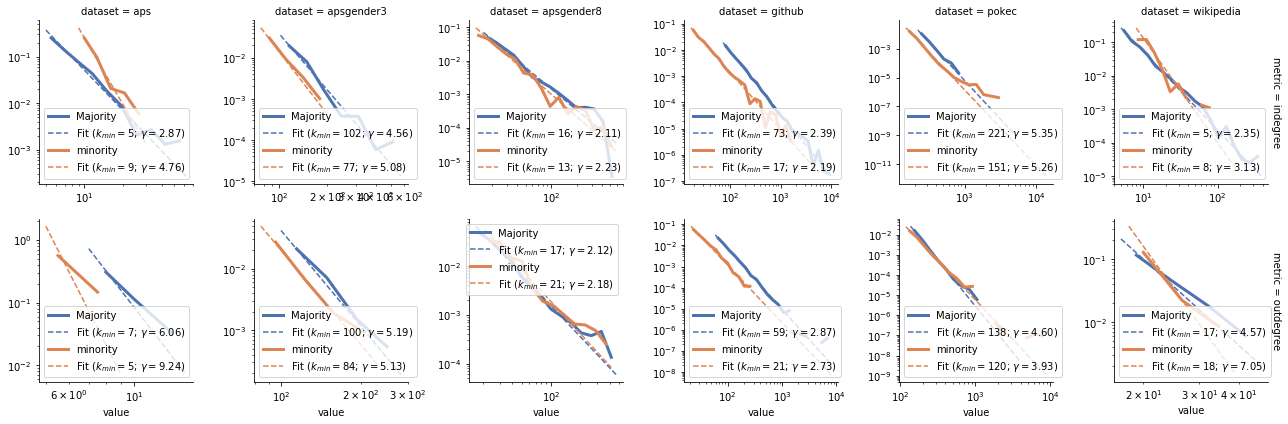

In [9]:
fn = os.path.join(PLOTS, 'distributions.pdf')
viz.plot_degree_distributions_groups(df_metadata_pivot, fn)